# Concrete Strength Prediction using Linear Regression

This notebook analyzes concrete strength data and builds a Linear Regression model to predict concrete strength based on various components.

## 1. Import Required Libraries

Import pandas, numpy, matplotlib, seaborn, and sklearn libraries for data manipulation, visualization, and machine learning.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

Use pandas to load the training and test datasets from CSV files.

In [2]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

# Display first few rows of training data
print("\nFirst 5 rows of training data:")
train_df.head()

Training data shape: (5407, 10)
Test data shape: (3605, 9)
Sample submission shape: (3605, 2)

First 5 rows of training data:


,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


## 3. Data Overview and Basic Information

Display basic information about the dataset including shape, data types, and missing values using pandas methods.

In [3]:
# Basic information about the dataset
print("Dataset Info:")
print(train_df.info())

print("\nDataset Description:")
print(train_df.describe())

print("\nMissing values in training data:")
print(train_df.isnull().sum())

print("\nMissing values in test data:")
print(test_df.isnull().sum())

print("\nColumn names:")
print(train_df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.6 KB
None

Dataset Description:
                id  CementComponent  BlastFurnaceSlag  FlyAshComponent  \
count  5407.000000      5407.000000       5407.000000 

## 4. Exploratory Data Analysis (EDA)

Create visualizations and statistical summaries to understand data distributions, correlations, and patterns using matplotlib and seaborn.

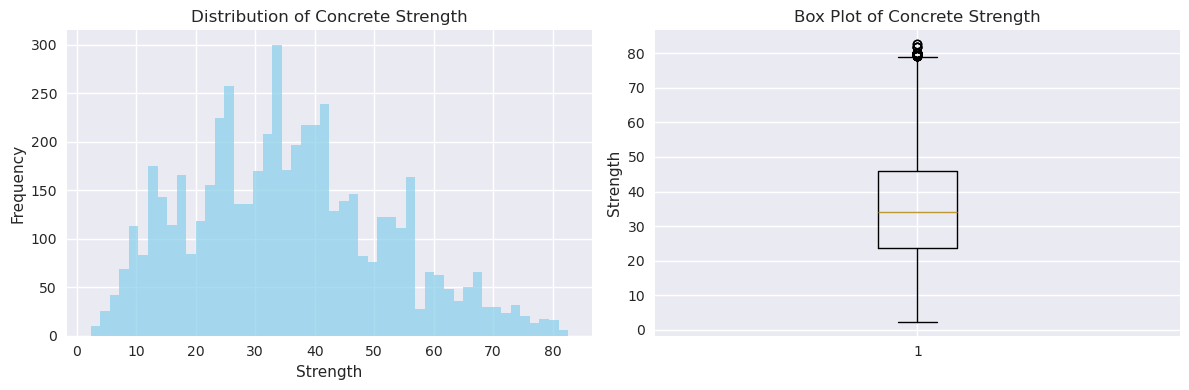

Strength statistics:
Mean: 35.45
Median: 33.95
Std: 16.40
Min: 2.33
Max: 82.60


In [4]:
# Target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(train_df['Strength'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Concrete Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(train_df['Strength'])
plt.title('Box Plot of Concrete Strength')
plt.ylabel('Strength')

plt.tight_layout()
plt.show()

print(f"Strength statistics:")
print(f"Mean: {train_df['Strength'].mean():.2f}")
print(f"Median: {train_df['Strength'].median():.2f}")
print(f"Std: {train_df['Strength'].std():.2f}")
print(f"Min: {train_df['Strength'].min():.2f}")
print(f"Max: {train_df['Strength'].max():.2f}")

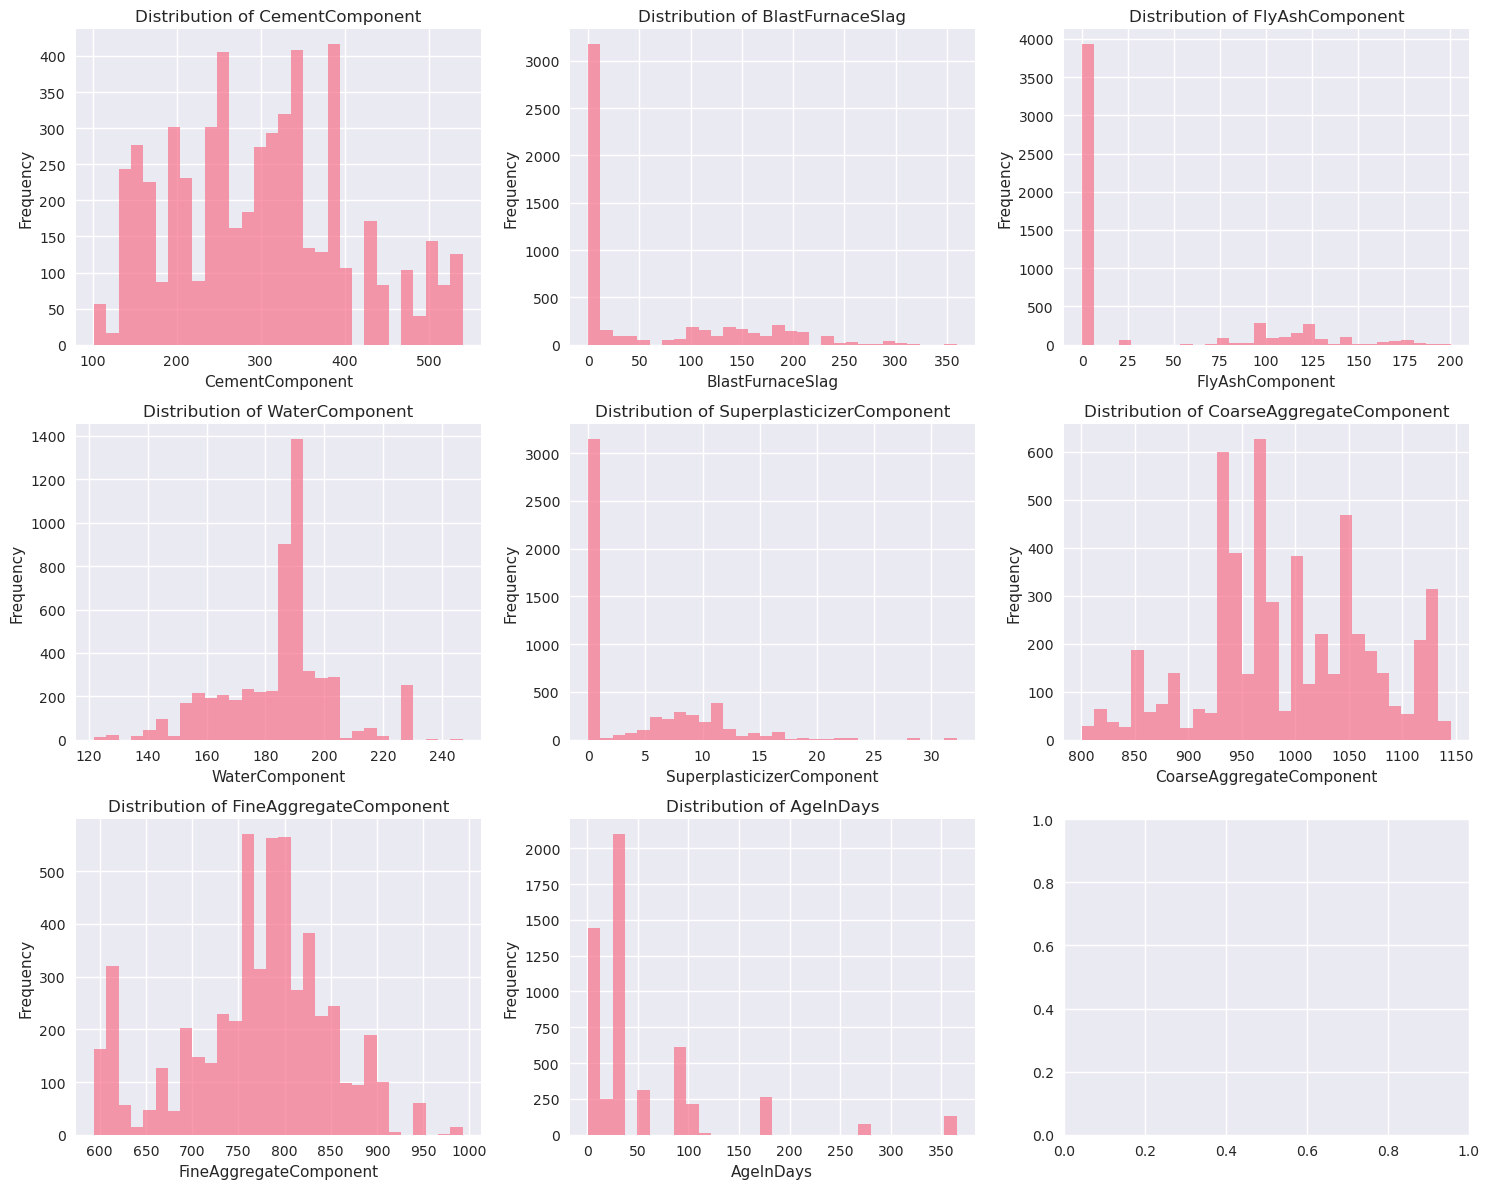

In [5]:
# Feature distributions
feature_cols = [col for col in train_df.columns if col not in ['id', 'Strength']]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    axes[idx].hist(train_df[col], bins=30, alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

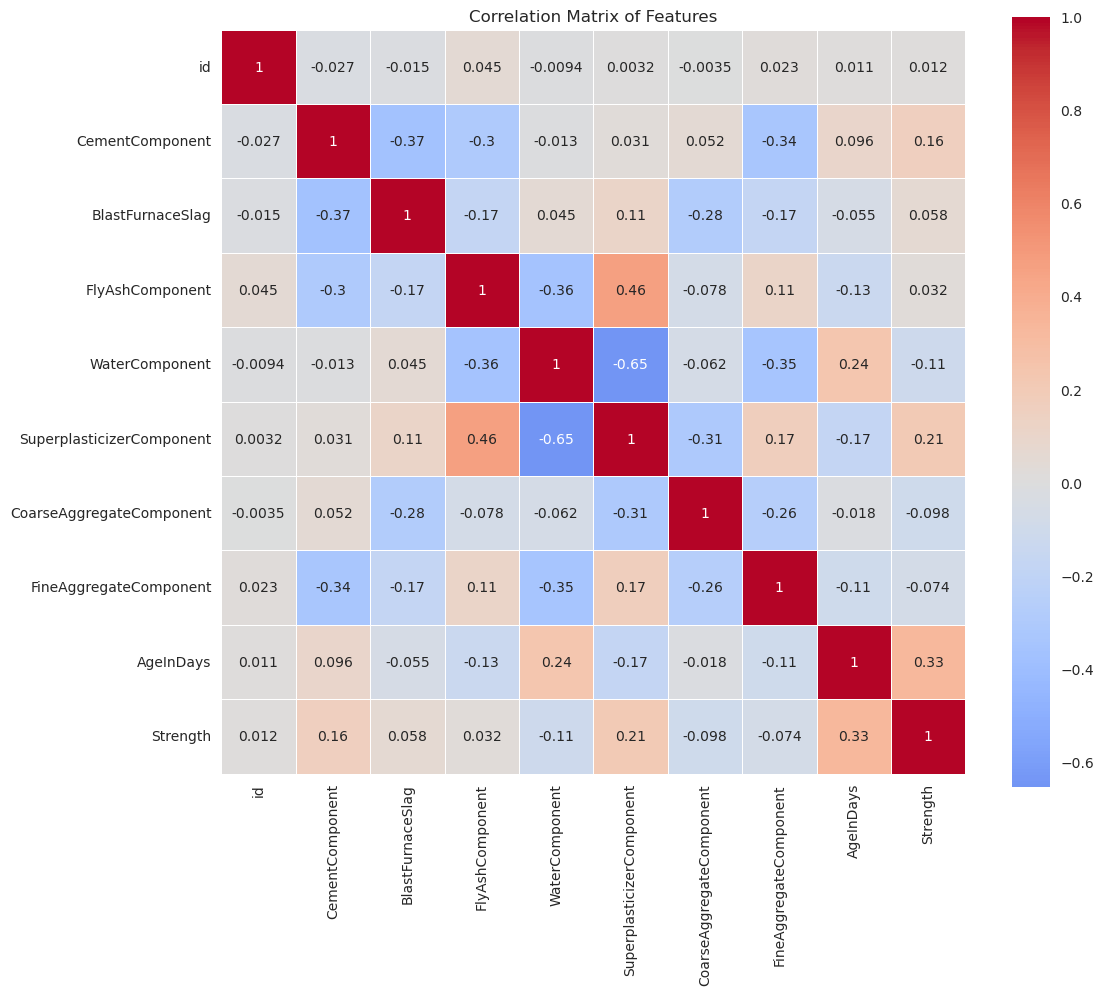


Correlations with Strength (target variable):
Strength                     1.000000
AgeInDays                    0.334204
SuperplasticizerComponent    0.208249
CementComponent              0.158000
BlastFurnaceSlag             0.057506
FlyAshComponent              0.031606
id                           0.011853
FineAggregateComponent      -0.073900
CoarseAggregateComponent    -0.098410
WaterComponent              -0.113678
Name: Strength, dtype: float64


In [6]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Show correlations with target variable
print("\nCorrelations with Strength (target variable):")
target_correlations = train_df.corr()['Strength'].sort_values(ascending=False)
print(target_correlations)

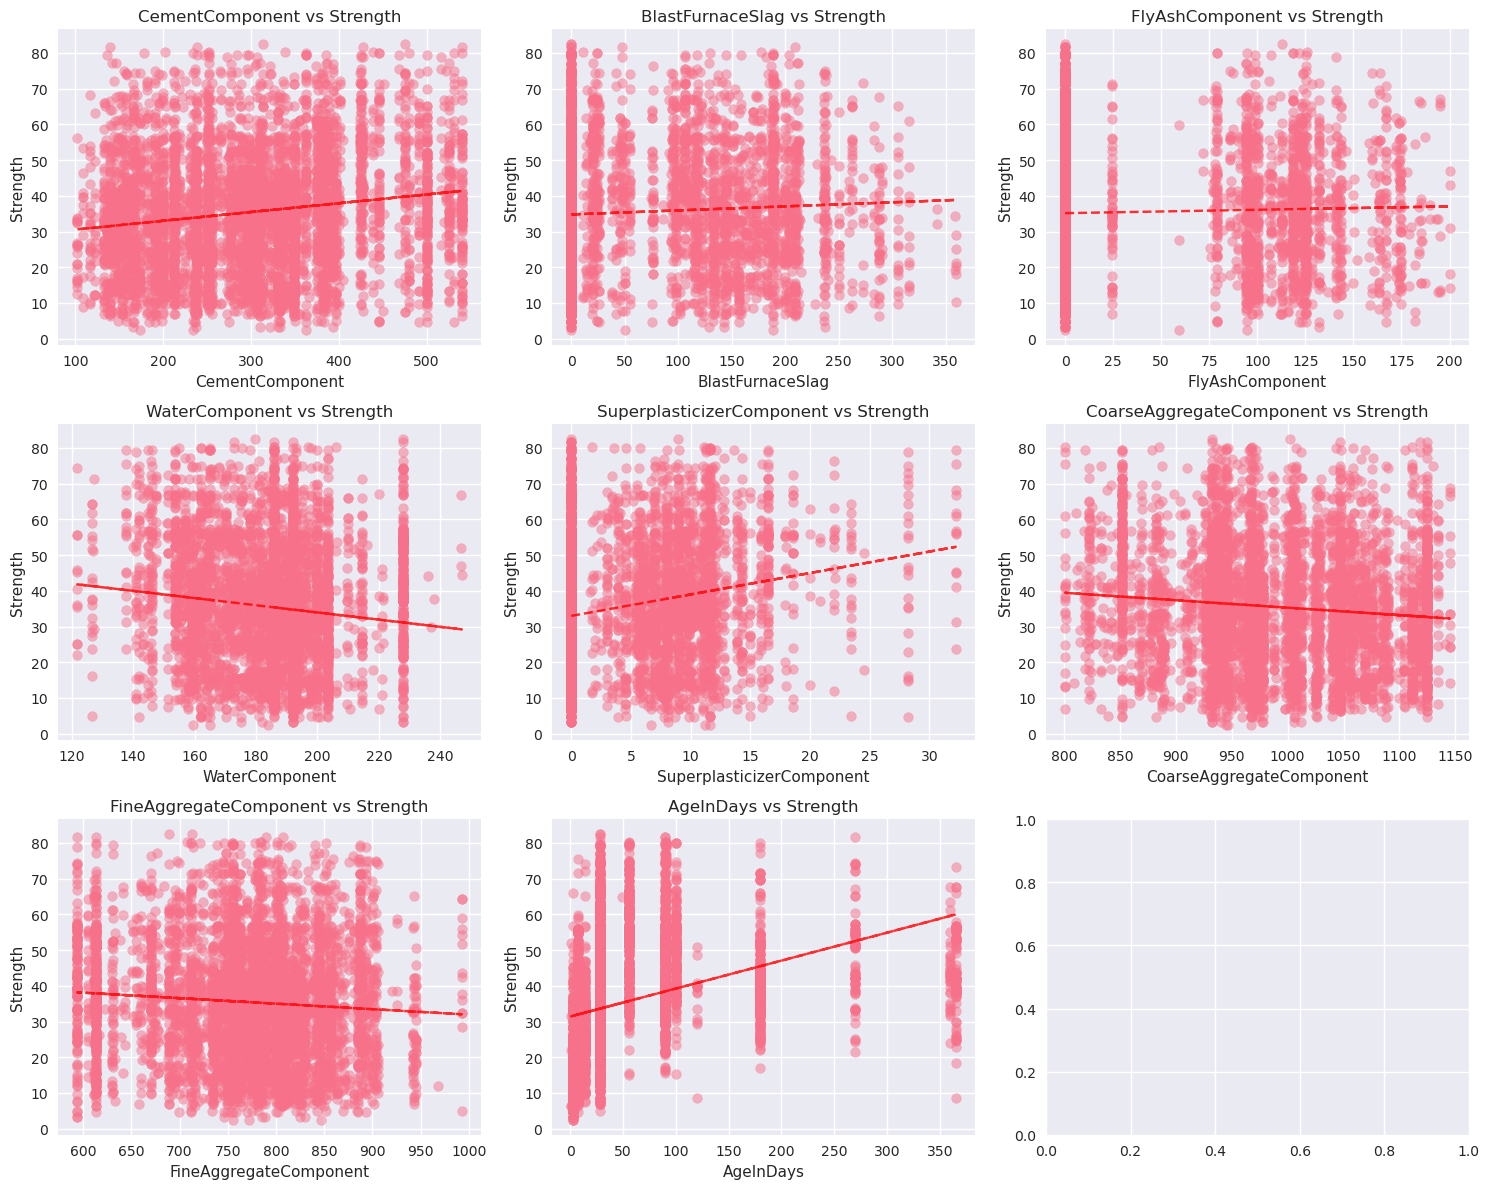

In [12]:
# Scatter plots of features vs target
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    axes[idx].scatter(train_df[col], train_df['Strength'], alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Strength')
    axes[idx].set_title(f'{col} vs Strength')
    
    # Add trend line
    z = np.polyfit(train_df[col], train_df['Strength'], 1)
    p = np.poly1d(z)
    axes[idx].plot(train_df[col], p(train_df[col]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

## 5. Data Preprocessing

Handle missing values, encode categorical variables, and scale features as needed for the Linear Regression model.

In [7]:
# Check for missing values again
print("Missing values in training data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

# Since there are no missing values, we proceed to feature selection
# Prepare features and target
X = train_df.drop(['id', 'Strength'], axis=1)
y = train_df['Strength']
X_test = test_df.drop(['id'], axis=1)

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Test feature matrix shape: {X_test.shape}")

print("\nFeature columns:")
print(X.columns.tolist())

Missing values in training data:
id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

Missing values in test data:
id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
dtype: int64

Feature matrix shape: (5407, 8)
Target vector shape: (5407,)
Test feature matrix shape: (3605, 8)

Feature columns:
['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']


In [8]:
# Feature scaling (optional for Linear Regression, but good practice)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Features scaled successfully!")
print(f"\nScaled training features shape: {X_scaled.shape}")
print(f"Scaled test features shape: {X_test_scaled.shape}")

# Display first few rows of scaled features
print("\nFirst 5 rows of scaled features:")
X_scaled.head()

Features scaled successfully!

Scaled training features shape: (5407, 8)
Scaled test features shape: (3605, 8)

First 5 rows of scaled features:


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,2.140020,-0.702680,-0.583751,0.049890,-0.721821,1.724109,-2.009960,-0.696447
1,-1.479876,1.323454,2.035299,0.319929,0.683717,-0.324092,-1.628853,-0.339306
2,-0.096355,0.912233,-0.583751,0.033688,-0.721821,1.075944,0.305903,-0.339306
3,0.045787,0.208481,-0.583751,2.318215,-0.721821,-0.777807,-1.285856,4.474945
4,-1.347209,2.126714,-0.583751,0.373937,-0.721821,-0.733732,0.126782,0.546402


## 6. Split Data into Train and Test Sets

Separate features and target variables, and split the training data for model validation.

In [9]:
# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Validation target shape: {y_val.shape}")

print(f"\nTraining set percentage: {len(X_train) / len(X_scaled) * 100:.1f}%")
print(f"Validation set percentage: {len(X_val) / len(X_scaled) * 100:.1f}%")

Training set shape: (4325, 8)
Validation set shape: (1082, 8)
Training target shape: (4325,)
Validation target shape: (1082,)

Training set percentage: 80.0%
Validation set percentage: 20.0%


## 7. Train Linear Regression Model

Create and train a Linear Regression model using sklearn, and evaluate its performance on validation data.

In [10]:
# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")

# Make predictions on validation set
y_val_pred = lr_model.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"\nModel Performance on Validation Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Linear Regression model trained successfully!

Model Performance on Validation Set:
Mean Squared Error (MSE): 207.2740
Root Mean Squared Error (RMSE): 14.3970
Mean Absolute Error (MAE): 11.4633
R² Score: 0.2383


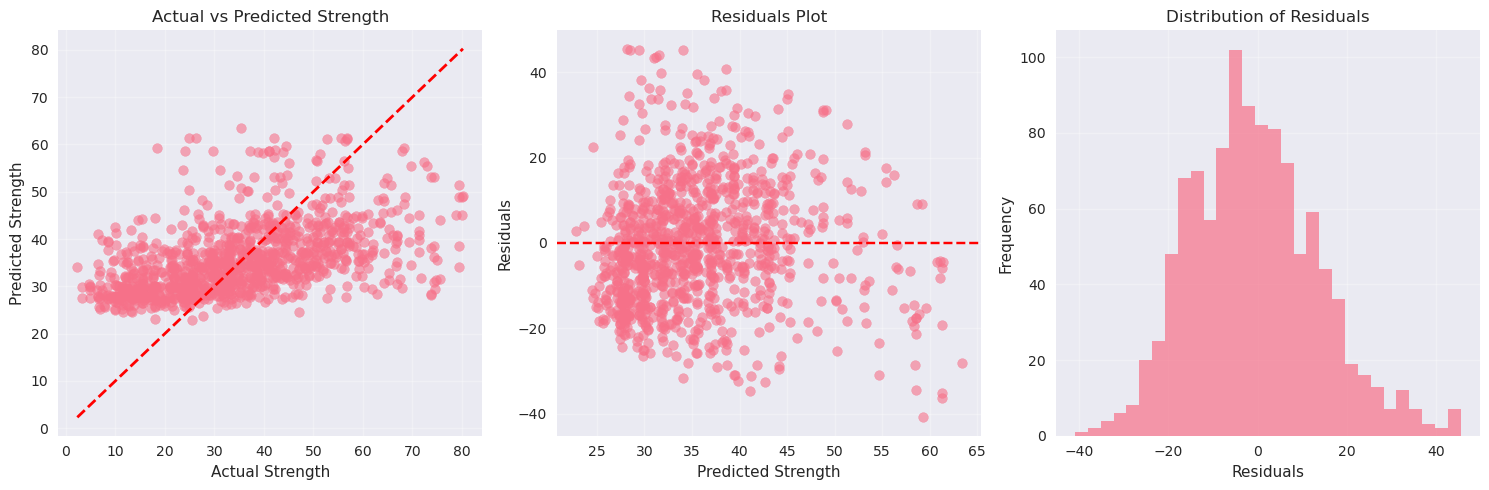

In [11]:
# Visualize model performance
plt.figure(figsize=(15, 5))

# Actual vs Predicted scatter plot
plt.subplot(1, 3, 1)
plt.scatter(y_val, y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Actual vs Predicted Strength')
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(1, 3, 2)
residuals = y_val - y_val_pred
plt.scatter(y_val_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Strength')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

# Residuals histogram
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Feature Importance (Coefficients):
                     Feature  Coefficient  Abs_Coefficient
7                  AgeInDays     6.069308         6.069308
4  SuperplasticizerComponent     2.974981         2.974981
0            CementComponent     2.482940         2.482940
1           BlastFurnaceSlag     1.850929         1.850929
3             WaterComponent    -1.361797         1.361797
6     FineAggregateComponent    -0.504508         0.504508
2            FlyAshComponent     0.392623         0.392623
5   CoarseAggregateComponent    -0.267434         0.267434


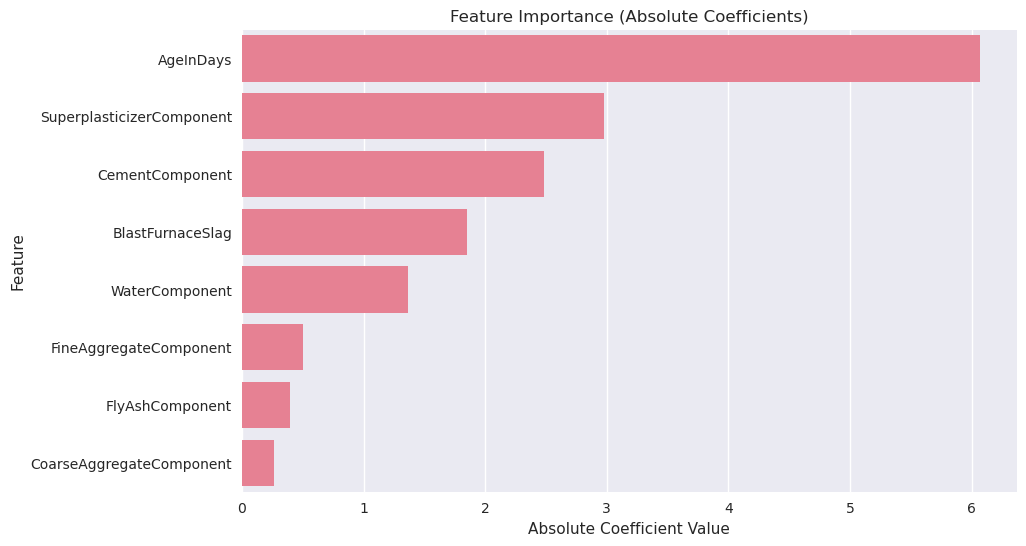


Model Intercept: 35.5893


In [12]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (Coefficients):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Abs_Coefficient', y='Feature')
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.show()

print(f"\nModel Intercept: {lr_model.intercept_:.4f}")

## 8. Make Predictions on Test Set

Use the trained model to make predictions on the test dataset.

In [13]:
# Make predictions on the test set
test_predictions = lr_model.predict(X_test_scaled)

print(f"Test predictions shape: {test_predictions.shape}")
print(f"\nFirst 10 test predictions:")
print(test_predictions[:10])

print(f"\nTest predictions statistics:")
print(f"Mean: {test_predictions.mean():.4f}")
print(f"Median: {np.median(test_predictions):.4f}")
print(f"Std: {test_predictions.std():.4f}")
print(f"Min: {test_predictions.min():.4f}")
print(f"Max: {test_predictions.max():.4f}")

Test predictions shape: (3605,)

First 10 test predictions:
[35.33933251 27.57185068 27.29782149 38.87597511 32.03876537 34.81510025
 28.80765324 31.69624128 39.98661396 33.2302175 ]

Test predictions statistics:
Mean: 35.4090
Median: 34.3788
Std: 6.9427
Min: 21.8063
Max: 66.1795


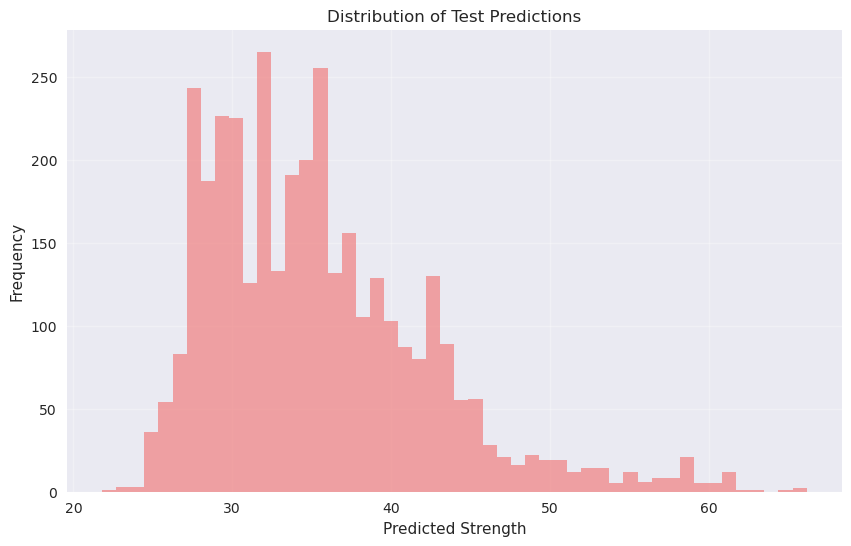

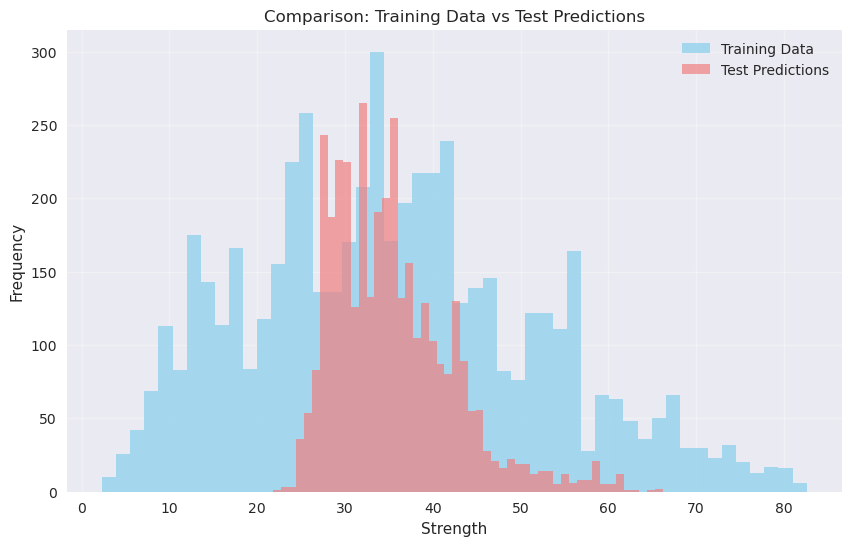

In [14]:
# Visualize test predictions
plt.figure(figsize=(10, 6))
plt.hist(test_predictions, bins=50, alpha=0.7, color='lightcoral')
plt.title('Distribution of Test Predictions')
plt.xlabel('Predicted Strength')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Compare with training data distribution
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50, alpha=0.7, label='Training Data', color='skyblue')
plt.hist(test_predictions, bins=50, alpha=0.7, label='Test Predictions', color='lightcoral')
plt.title('Comparison: Training Data vs Test Predictions')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 9. Save Predictions to CSV File

Create a submission dataframe with predictions and save it to 'submission.csv' using pandas.

In [18]:
# Create submission dataframe
submission = pd.DataFrame({
    'id': test_df['id'],
    'Strength': test_predictions
})

print("Submission dataframe created:")
print(submission.head(10))
print(f"\nSubmission shape: {submission.shape}")

# Verify the format matches sample submission
print(f"\nSample submission shape: {sample_submission.shape}")
print(f"Columns match: {list(submission.columns) == list(sample_submission.columns)}")

Submission dataframe created:
     id   Strength
0  5407  35.339333
1  5408  27.571851
2  5409  27.297821
3  5410  38.875975
4  5411  32.038765
5  5412  34.815100
6  5413  28.807653
7  5414  31.696241
8  5415  39.986614
9  5416  33.230218

Submission shape: (3605, 2)

Sample submission shape: (3605, 2)
Columns match: True


In [19]:
# Save to CSV file
submission.to_csv('submission.csv', index=False)

print("Predictions saved to 'submission.csv' successfully!")

# Verify the file was created and read it back
verification = pd.read_csv('submission.csv')
print(f"\nVerification - File shape: {verification.shape}")
print("First 5 rows of saved file:")
print(verification.head())
print("\nLast 5 rows of saved file:")
print(verification.tail())

Predictions saved to 'submission.csv' successfully!

Verification - File shape: (3605, 2)
First 5 rows of saved file:
     id   Strength
0  5407  35.339333
1  5408  27.571851
2  5409  27.297821
3  5410  38.875975
4  5411  32.038765

Last 5 rows of saved file:
        id   Strength
3600  9007  32.811090
3601  9008  28.951219
3602  9009  35.874958
3603  9010  54.630201
3604  9011  30.165274


## Summary

### Model Performance:
- **Model Type**: Linear Regression
- **Validation R² Score**: Check the output above
- **Validation RMSE**: Check the output above

### Key Findings:
1. **Feature Importance**: The model coefficients show which concrete components have the strongest impact on strength
2. **Data Quality**: No missing values in the dataset
3. **Model Performance**: Linear regression provides a baseline model for concrete strength prediction

### Next Steps for Improvement:
1. Try polynomial features or interaction terms
2. Experiment with other regression models (Random Forest, Gradient Boosting)
3. Feature engineering (ratios between components)
4. Cross-validation for more robust performance estimation

The predictions have been saved to `submission.csv` and are ready for submission!